# GIS Exercise 3: Aggregation of Country Populations

## For WR514: GIS and Data Analysis in Natural Resources

Completed by A.J. Brown on 5 April 2023

In [19]:
# import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
# set graph size
plt.rcParams['figure.figsize'] = [20, 10]

In [31]:
# import data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# sparse into population
world = world[['name','continent', 'geometry', 'pop_est']]
world.head()

,name,continent,geometry,pop_est
0,Fiji,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",920938
1,Tanzania,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",53950935
2,W. Sahara,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",603253
3,Canada,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",35623680
4,United States of America,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",326625791


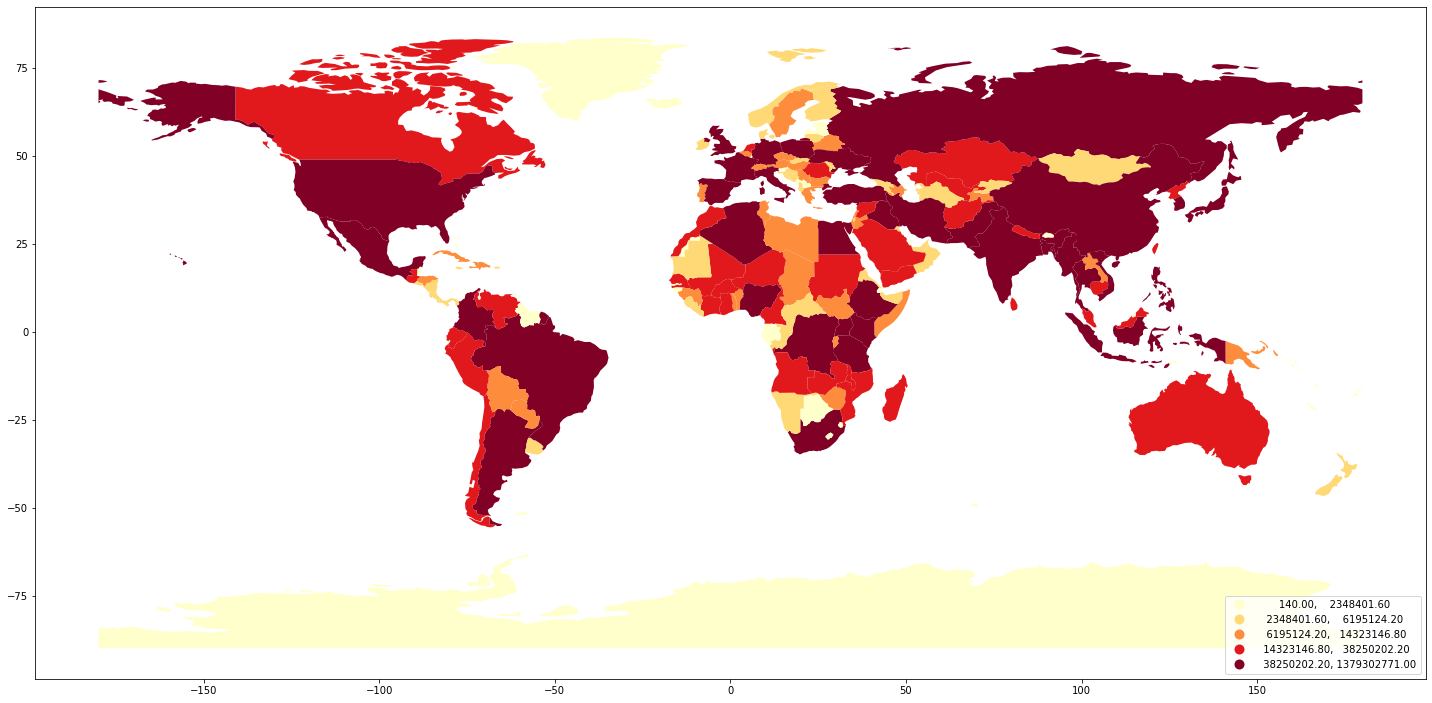

In [32]:
# plot country data
world.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd', legend=True, legend_kwds={'loc': 'lower right'})
plt.tight_layout()
plt.savefig('country_pop.jpg')

In [33]:
# Aggregate country data into continent data using dissolve()
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...",1219176238
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112


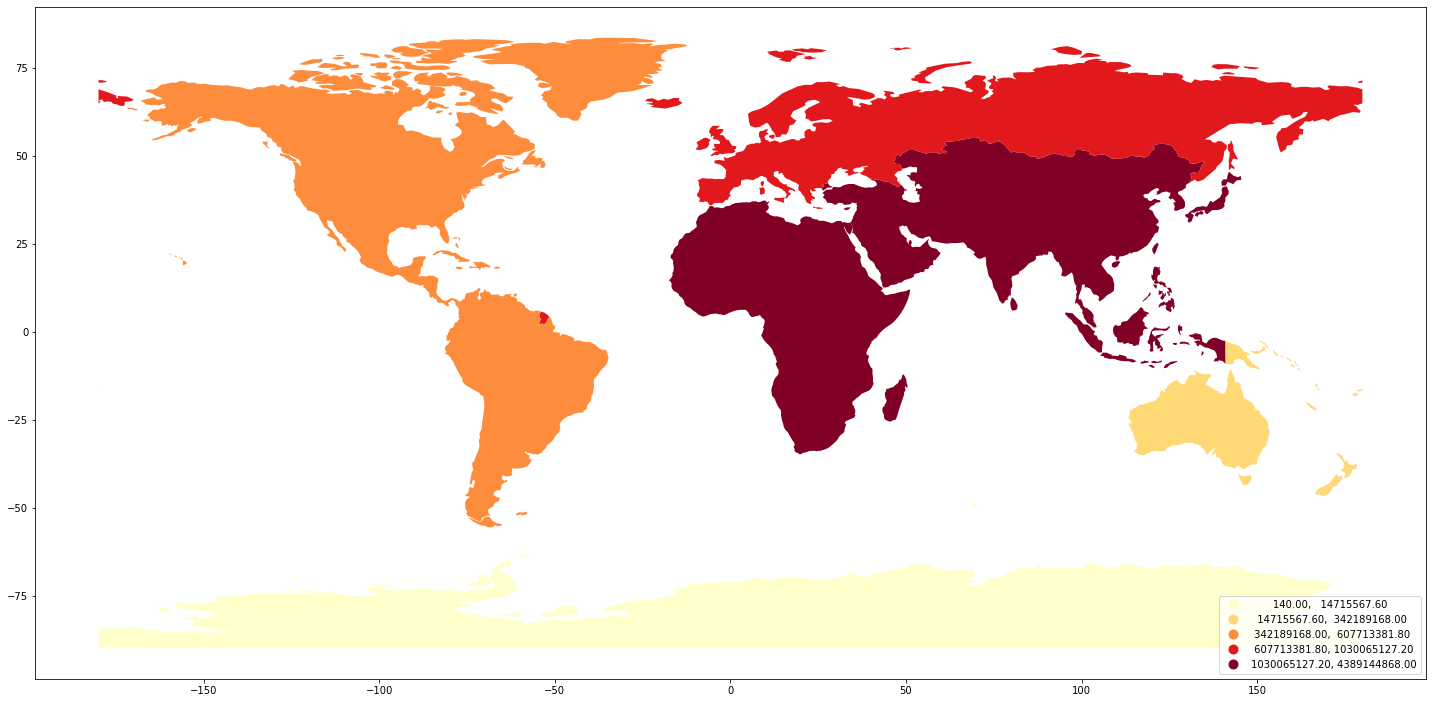

In [24]:
# Plot newly aggregated data in map
continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd', legend=True, legend_kwds={'loc': 'lower right'});
plt.tight_layout()
plt.savefig('continent_pop.jpg')